In [80]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [81]:
data1 = sio.loadmat('ex7data1.mat')
X = data1['X']


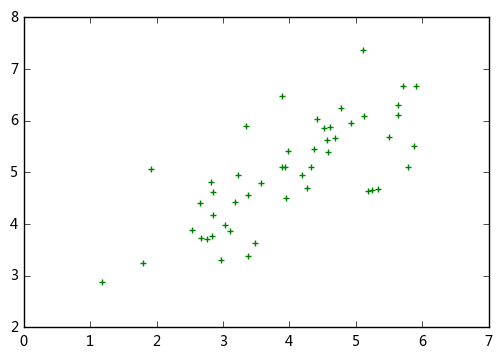

In [82]:
plt.scatter(X[:, 0], X[:, 1], marker='+', c='g')

plt.show()

In [83]:
def featureNormalize(X):
    mean = np.mean(X, 0)
    std = np.std(X, 0)
    X_norm = (X-mean)/std
    return X_norm, mean, std

In [84]:
X_norm, mean, std = featureNormalize(X)

In [85]:
def pca(X):
    m, n = X.shape
    U=S= np.zeros(n)
    covX = np.cov(X.T)
    U , S, W= np.linalg.svd(covX)
    return U, S

In [86]:
U, S = pca(X_norm)

In [107]:
K = 1
def decData(X, U, K):
    z = np.zeros((X.shape[0], K))
    U_redu = U[:, 0:K]
    z = X.dot(U_redu)
    return z


In [88]:
z = decData(X_norm, U, K)


In [89]:
def recovData(z, U, K):
    U_redu = U[:, 0:K]
    X_rec = z.dot(U_redu.T)
    return X_rec

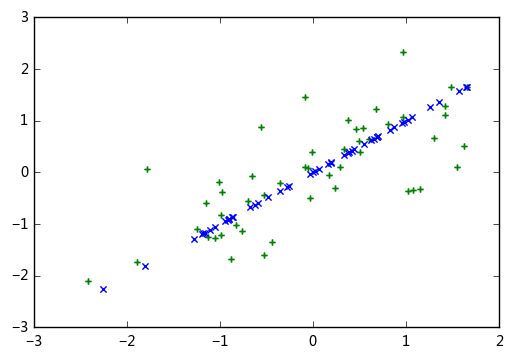

In [92]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker='+', c='g')
plt.scatter(X_rec[:, 0], X_rec[:, 1], marker='x', c='b')
plt.plot()
plt.show()

In [91]:
X_rec = recovData(z, U, K)

In [93]:
X_rec

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802],
       [ 0.44666359,  0.44666359],
       [ 0.39088959,  0.39088959],
       [ 0.06341447,  0.06341447],
       [ 0.371835  ,  0.371835  ],
       [-1.10602429, -1.10602429],
       [ 1.35488989,  1.35488989],
       [ 0.62706042,  0.62706042],
       [-0.67604623, -0.67604623],
       [ 1.64752825,  1.64752825],
       [ 0.33795364,  0.33795364],
       [ 1.56798945,  1.56798945],
       [-0.27506901, -0.27506901],
       [ 1.26206077,  1.26206077],
       [-0.03659622, -0.03659622],
       [-1.17742041, -1.17742041],
       [-0.35930621, -0.35930621],
       [ 0.874769  ,  0.874769  ],
       [ 0.82871979,  0.82871979],
       [-0.59553725,

In [94]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
#face data
data2 = sio.loadmat('ex7faces.mat')
X = data2['X']

In [95]:
def displayData(data, initial_width=20):
    m, n = data.shape
    initial_height = int(n/initial_width)
    display_rows = int(np.sqrt(m))#向下取整
    display_cols = math.ceil(m/display_rows)#向上取整
    pad = 1
    display_array =  -np.ones((pad+display_rows * (initial_height + pad), pad+display_cols * (initial_width + pad)))
    curr_ex = 0
    for i in range(0, display_rows):
        for j in range(0, display_cols):
            if curr_ex>m:
                break
            max_val = np.max(np.abs(data[curr_ex, :]))
            display_array[0+(pad+(i)*(initial_height+pad)):initial_height+(pad+(i)*(initial_height+pad)),
                         0+(pad+(j)*(initial_width+ pad)):initial_width+(pad+(j)*(initial_width+pad))]=data[curr_ex, 
                                                                                    :].reshape(initial_height,
                                                                                              initial_width)/max_val
            
            curr_ex +=1
        if curr_ex>m:
            break
    plt.gray()
    plt.matshow(display_array.T)
    plt.show()

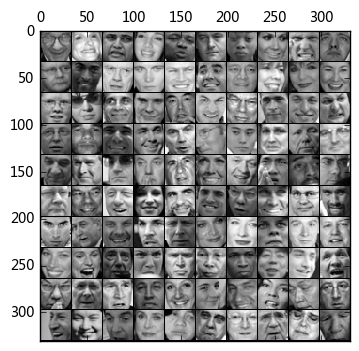

In [96]:
import math
displayData(X[0:100], 32)

In [97]:
X_norm, mean, std = featureNormalize(X)

In [98]:
U, S = pca(X_norm)

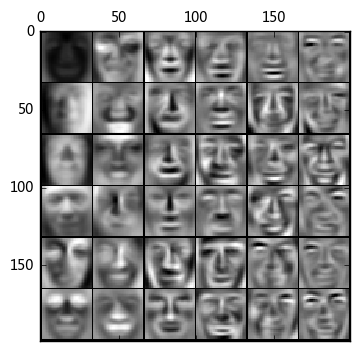

In [106]:
displayData(U[:,0:36].T, 32)

In [108]:
z = decData(X_norm, U, 100)

In [110]:
X_rec = recovData(z, U, 100)

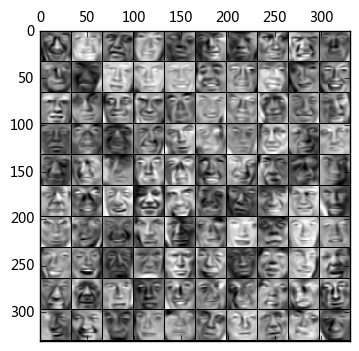

In [112]:
displayData(X_rec[0:100], 32)

In [145]:
#
A = np.array(Image.open('bird_small.png'))

In [116]:
A = A/255

In [142]:
I = A.reshape(A.shape[0]*A.shape[1], A.shape[2])